# This is an MNIST Neural Network model using Mean-Squared error as the loss function
## This model is a binary classification; whether it is a certain number (1) or not(-1).
I will classify if this program recognizes the number 8 or not.

In [40]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense, Activation
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Initial example dimensions')
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

Initial example dimensions
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
plt.imshow(x_train[0],cmap='gray')
plt.title('Number {}',y_train[0])

AttributeError: 'numpy.uint8' object has no attribute 'pop'

In [6]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
nx_train = x_train / 255
nx_test = x_test / 255

In [7]:
print('Final example dimensions')
print("x_train shape:", x_train.shape,'and its data type:' ,nx_train.dtype)
print("y_train shape:", y_train.shape,'and its data type:' ,y_train.dtype)
print("x_test shape:", x_test.shape,'and its data type:', nx_test.dtype)
print("y_test shape:", y_test.shape,'and its data type:', y_test.dtype)

Final example dimensions
x_train shape: (60000, 784) and its data type: float64
y_train shape: (60000,) and its data type: uint8
x_test shape: (10000, 784) and its data type: float64
y_test shape: (10000,) and its data type: uint8


In [8]:
model = Sequential()
model_hinge = Sequential()

model.add(Dense(1, input_shape=(784,), activation='linear'))
model_hinge.add(Dense(1, input_shape=(784,), activation='softsign'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import SGD

def perceptron_loss(y_true,y_pred):
    tf.cast(y_true, tf.float32)
    return(tf.maximum(0.0,-(y_true)*y_pred))

opt = keras.optimizers.SGD(lr=.01)
opt_hinge = keras.optimizers.SGD(lr=0.001)


model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model_hinge.compile(optimizer=opt_hinge, loss='hinge', metrics=['accuracy'])

In [10]:
from keras.callbacks import LearningRateScheduler

def schedule(epoch_index,lrate):
    return(1.0)

keras.callbacks.LearningRateScheduler(schedule, verbose=0)

In [11]:
# Initialize train data and labels

training = nx_train
testing = nx_test
labels = np.where(y_train==2,1,-1)
testlabel = np.where(y_test==2,1,-1)

In [10]:
import keras.backend as K
import numpy.random as npr
model.layers[0].set_weights([npr.random(size=(784,1))/1.2,npr.random(size=(1,1))[0]/1.2])
model.fit(training, labels, epochs=70, batch_size=2200,verbose=0)

# model_hinge.layers[0].set_weights([np.ones((784,1))/100,np.array([0.0])])
# model_hinge.fit(training, labels, epochs=3, batch_size=100)
w = model.layers[0].get_weights()

In [11]:
model_hinge.layers[0].set_weights([np.ones((784,1))/100,np.array([0.01])])
model_hinge.fit(training, labels, epochs=5, batch_size=100)
w_hinge = model_hinge.layers[0].get_weights()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.6322 - accuracy: 0.6177
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.4038 - accuracy: 0.8999
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3691 - accuracy: 0.9007
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3503 - accuracy: 0.9007
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3378 - accuracy: 0.9007


In [12]:
model.evaluate(x=nx_test, y=testlabel)
# model_hinge.evaluate(x=nx_test, y=testlabel)

10000/10000 [==============================] - 0s 26us/step


[0.30900807437896727, 0.7419999837875366]

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(training, labels)
acc_LR = reg.score(testing,testlabel)
print('Acc:',acc_LR )

The coefficients (when we fit an intercept) from scikit-learn are:
  [ 6.01905799e-05 -5.35704062e-01  2.72590297e-01  1.30947481e-01
  4.19313750e-01  1.04784334e-01 -1.39177867e-01 -1.07357686e-01
 -4.13314060e-02 -3.64863899e-02 -1.78580756e-01 -5.39174036e-01
 -9.25469758e-03  4.22655480e-03 -8.16192459e-04 -7.15656987e-02
 -9.08075456e-02  1.13105610e-01  6.06382670e-02 -7.70478177e-02
 -1.90558209e-02 -8.32603868e-03 -7.05782808e-02  1.00158445e-01
  6.59585426e-02 -5.05216938e-02  1.46004659e-02  1.19248375e-01
 -5.86888506e-03 -1.70655649e-02]
Acc: -59478121665.7042


In [32]:
normalized_w = (w[0]/np.linalg.norm(w[0])).reshape(784,)
normalized_w_hinge = (w_hinge[0]/np.linalg.norm(w_hinge[0])).reshape(784,)

print(normalized_w[0:10],'\n')
normalized_reg = reg.coef_/np.linalg.norm(reg.coef_)
print('Correlation between LinearRegression and NN(LinearRegreassion)',normalized_w @ normalized_reg)
print('Correlation between LinearRegression and NN(Hinge loss))',normalized_w_hinge @ normalized_reg)

[0.08824697 0.0768811  0.0073307  0.08871743 0.03782418 0.06132302
 0.0519054  0.06369741 0.0587188  0.03684818] 

Correlation between LinearRegression and NN(LinearRegreassion) 0.07225904098249104
Correlation between LinearRegression and NN(Hinge loss)) 0.018539817806554768


The Neural Network only reached to a local minmum while the LinearRegression model saw its global minumum.

# Support Vector Machine

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='poly',verbose=0)
clf.fit(training, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=0)

In [34]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(testing)
print('Acc:', accuracy_score(y_pred, testlabel))

Acc: 0.9938


## SVM as a Neural Network

### Linear SVM
* Hinge loss
* l2 regularization

In [12]:
model_linsvm = Sequential()
model_linsvm.add(Dense(784, input_shape=(784,), activation='linear'))
model_linsvm.add(Dense(1,kernel_regularizer = keras.regularizers.l2(l=1.0), activation='linear'))

learning_rate = 0.01
batch_size = np.int32(1/(learning_rate**2))


model_linsvm.compile(optimizer=keras.optimizers.SGD(lr=learning_rate), loss='hinge', metrics=['accuracy'])
# model_linsvm.layers[0].set_weights([npr.random(size=(784,1))/1.2,npr.random(size=(1,1))[0]/1.2])
model_linsvm.fit(training, labels, epochs=50, batch_size=batch_size,verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 709.9809 - accuracy: 0.4819
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 557.0373 - accuracy: 0.5588
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 437.1603 - accuracy: 0.5840
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 343.0928 - accuracy: 0.5986
Epoch 5/50
50000/60000 [========================>.....] - ETA: 0s - loss: 274.5642 - accuracy: 0.6133

KeyboardInterrupt: 

In [108]:
model_svm = Sequential()
model_svm.add(Dense(np.int32(round(3*np.log2(60000)), input_shape=(784,), activation='relu')))
model_svm.add(Dense(1,input_shape=(np.int32(round(3*np.log2(60000))),),kernel_regularizer = keras.regularizers.l2(l=1.0), activation='linear'))

learning_rate = 0.02
batch_size = np.int32(1/(learning_rate **2))

model_svm.compile(optimizer=keras.optimizers.SGD(lr=learning_rate), loss='hinge', metrics=['accuracy'])
# model_svm.layers[0].set_weights([npr.random(size=(784,1))/1.2,npr.random(size=(1,1))[0]/1.2])
model_svm.fit(training, labels, epochs=30, batch_size=batch_size,verbose=1)
w = model_svm.layers[0].get_weights()

Epoch 1/30
60000/60000 [==============================] - 1s 21us/step - loss: 1.0770 - accuracy: 0.6269
Epoch 2/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.4062 - accuracy: 0.7883
Epoch 3/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.3090 - accuracy: 0.8168
Epoch 4/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2777 - accuracy: 0.8318
Epoch 5/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2599 - accuracy: 0.8457
Epoch 6/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2474 - accuracy: 0.8591
Epoch 7/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2381 - accuracy: 0.8711
Epoch 8/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2308 - accuracy: 0.8809
Epoch 9/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2249 - accuracy: 0.8894
Epoch 10/30
60000/60000 [==============================] - 0s 6

## Using CI-FAR 10 Dataset
* Multi-Class Nerual Network
* SVM Layer with ReLu actication function

In [43]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense, Activation
import tensorflow as tf
from keras.models import Sequential
import numpy.random as npr
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.initializers import RandomUniform

In [17]:

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


In [18]:
print('Initial dimensions')
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Initial dimensions
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [19]:
# flat_X_train = X_train.reshape(50000,32*32,3)
# flat_X_test = X_test.reshape(10000,32*32,3)
new_X_train = X_train / 255
new_X_test = X_test / 255

new_X_train = new_X_train.reshape(50000,32*32*3)
new_X_test = new_X_test.reshape(10000,32*32*3)
new_Y_train = Y_train.reshape(50000)
new_Y_test = Y_test.reshape(10000)
print("New dimensions")
print("flat_X_train shape:", new_X_train.shape)
print("flat_X_test shape:", new_X_test.shape)
print("new_Y_train shape:", new_Y_train.shape)
print("new_Y_test shape:", new_Y_test.shape)

New dimensions
flat_X_train shape: (50000, 3072)
flat_X_test shape: (10000, 3072)
new_Y_train shape: (50000,)
new_Y_test shape: (10000,)


In [31]:
from keras.optimizers import SGD

def perceptron_loss(y_true,y_pred):
    tf.cast(y_true, tf.float32)
    return(tf.maximum(0.0,-(y_true)*y_pred))

opt = keras.optimizers.SGD(lr=.02)
opt_hinge = keras.optimizers.SGD(lr=0.01)


model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model_hinge.compile(optimizer=opt_hinge, loss='hinge', metrics=['accuracy'])

In [32]:
# Initialize train data and labels
training = new_X_train
testing = new_X_test
labels = np.where(Y_train==2,1,-1)
testlabel = np.where(Y_test==2,1,-1)


In [37]:
import keras.backend as K
model.fit(training, labels, epochs=100, batch_size=64,verbose=1)
model.evaluate(x=testing,y=testlabel)


Epoch 1/100
31424/50000 [=================>............] - ETA: 1s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

reg = LinearRegression(fit_intercept=True).fit(training, labels)
y_pred = reg.predict(testing)

# acc_LR = r2_score(testing,y_pred)
acc_LR = accuracy_score(testlabel,y_pred.round(), normalize=True)
print('Acc:',acc_LR)

Acc: 0.835


In [6]:
encoded_Y_train = keras.utils.to_categorical(Y_train,10)
encoded_Y_test = keras.utils.to_categorical(Y_test,10)
print(encoded_Y_train.shape)

(50000, 10)


## Binary Linear Regression

In [4]:
model = Sequential()
model_hinge = Sequential()

model.add(Dense(1, input_shape=(3072,), activation='linear'))
model_hinge.add(Dense(1, input_shape=(3072,), activation='softsign'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3073      
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


## Binary SVM

In [ ]:
model_cifar10 = Sequential([keras.layers.Flatten(input_shape=(32,32,3))])
model_cifar10.add(Dense(np.int32(round(3*np.log2(50000)), input_shape=(32*32*3), activation='relu')))
model_cifar10.add(Dense(10,input_shape=(np.int32(round(3*np.log2(50000))),),kernel_regularizer = keras.regularizers.l2(l=0.01), activation='linear'))

model_cifar10.summary()
import numpy.random as npr
learning_rate = .01
batch_size = np.int32(1/(learning_rate**2))
print("Batch size:",batch_size)

model_cifar10.compile(optimizer=keras.optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model_cifar10.layers[1].set_weights([npr.random(size=(32*32*3,46)),npr.random(size=(1,46))[0]])
model_cifar10.fit(new_X_train, encoded_Y_train, epochs=100, batch_size=batch_size,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 47)                144431    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                480       
Total params: 144,911
Trainable params: 144,911
Non-trainable params: 0
_________________________________________________________________
Batch size: 10000
Epoch 1/100


In [249]:
model_cifar10.evaluate(x=new_X_test, y=encoded_Y_test)

10000/10000 [==============================] - 3s 297us/step


[1.8420968828201294, 0.3846000134944916]

In [250]:
prediction = model_cifar10.predict_classes(new_X_test)

[5]
5


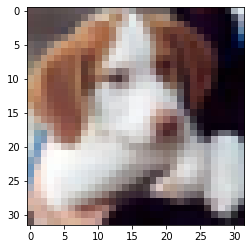

In [251]:
i=16
plt.imshow(X_test[i])
print(Y_test[i])
print(prediction[i])

In [252]:
count = 0
for i in range(10000):
    if Y_test[i] == prediction[i]:
        count = count + 1
print("score is :",count/10000 * 100)

score is : 38.46


In [82]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
new_X_train = X_train / 255
new_X_test = X_test / 255

new_X_train = new_X_train.reshape(50000,32*32*3)
new_X_test = new_X_test.reshape(10000,32*32*3)
new_Y_train = Y_train.reshape(50000)
new_Y_test = Y_test.reshape(10000)
encoded_Y_train = to_categorical(Y_train,10)
encoded_Y_test = to_categorical(Y_test,10)
opt = keras.optimizers.SGD(lr=.08,momentum=0.01,nesterov=True,decay = .001/ epochs)

model = Sequential()
model.add(Dense(60, input_shape=(3072,), activation='relu',kernel_initializer=RandomUniform(minval=-.2, maxval=.2, seed=2),bias_initializer=RandomUniform(minval=-.1, maxval=.1)))
model.add(Dense(10,input_shape=(60,),kernel_regularizer = keras.regularizers.l2(l=.125/2), activation='linear'))

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
training = new_X_train
testing = new_X_test
labels = encoded_Y_train
testlabel = encoded_Y_test


NameError: name 'learning_rate' is not defined

In [ ]:
batch_size = 100
model.fit(training, labels, epochs=150, batch_size=batch_size,verbose=1)
model.evaluate(x=testing, y=testlabel)